# Food Safety

Exploration of the [Food Standards Agency's Data](http://ratings.food.gov.uk/) for Glasgow Establishments.
The data for this analysis was downloaded using the code in ./data/data_download.ipynb

### Importing the library
"pd" is the common short name given to the pandas library

In [1]:
import pandas as pd

If looking for a deeper look at getting started in pandas, there is 2017 SciPy talk [here](https://github.com/chendaniely/scipy-2017-tutorial-pandas)

For a quick overview, I recommend the [Cheat Sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

### Opening a Comma Separated Value file
The **read_csv** function can also handle most tipes of flat files (i.e. stuff you can read with your favourite notepad application) provided that correct parametres are passed. The method handels skipping rows, parsing dates from different columns, differnt encodings, zipped sources and more.

For the full documentation: [read_csv docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [2]:
df = pd.read_csv('./data/food_safety_Glasgow.csv')

### Exploring the data
There are many ways to explore the data. Some of the simplest are:

```python
    df             # showing the "full" dataset
    df.shape       # checking the size of the dataset
    df.head(2)     # looking at first 2 rows. For last rows use df.tail()
    df['Latitude'] # look for a specific column
    df[mymask]     # use a row-based mask to extract information
    df.loc[639]    # grabbing a sample row (using index label) 
    df.iloc[639]   # grabbing a sample row (using integer-location index)
    df.columns     # looking at all column names
    df.info()      # summary non-nulls and types for each column
    df.describe()  # basic statistics (only for the numeric columns)
    
    df.describe().loc['25%', Latitude]   # go query-crazy
```

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5247 entries, 0 to 5246
Data columns (total 21 columns):
FHRSID                        5247 non-null int64
LocalAuthorityBusinessID      5247 non-null object
BusinessName                  5247 non-null object
BusinessType                  5247 non-null object
BusinessTypeID                5247 non-null int64
AddressLine2                  5247 non-null object
AddressLine3                  5247 non-null object
PostCode                      4954 non-null object
RatingValue                   5247 non-null object
RatingKey                     5247 non-null object
RatingDate                    5247 non-null object
LocalAuthorityCode            5247 non-null int64
LocalAuthorityName            5247 non-null object
LocalAuthorityWebSite         5247 non-null object
LocalAuthorityEmailAddress    5247 non-null object
Scores                        0 non-null float64
SchemeType                    5247 non-null object
NewRatingPending              5

In [4]:
df.describe().loc['25%', 'Latitude'] 

55.849084

In [5]:
df[['BusinessName','Latitude']]

BusinessName   Latitude
0                                      #43  55.843804
1       (DC1) Donut Coffee (Supreme Group)  55.870607
2                           (Nisa) News 24  55.860794
3                              (Starbucks)  55.872982
4              1 Call Direct Staff Canteen  55.863606
5                               1 Level Up  55.857455
6                              1 Stop News  55.862444
7                                    10 10  55.866763
8                    101 Convenience Store  55.892573
9                    101 Convenience Store  55.845910
10                                1051 GWR  55.884459
11                             111 By Nico  55.888651
12                          123 Tasty Ltd.  55.815172
13                                14 Forty  55.860699
14                        1478 Social Club  55.812693
15                                  1A Wok  55.851861
16                                  1A Wok  55.849962
17                                    2 Go  55.870617
18                   200 St Vincent Street  55.862290
19                  221 Transport Squadron  55.825951
20                                    24/7  55.877492
21                          26 Hope Street  55.859302
22                         279 Cafe Bistro  55.870516
23                     3 Bridges Care Home  55.820136
24       32nd  ( Scottish )Signal Regiment  55.877088
25                    333 Chinese Takeaway  55.889358
26                           393 Caffe Bar  55.864751
27                           3D Drumchapel  55.909385
28                                 5 A Day  55.851507
29                           5 Star Bakery  55.834615
...                                    ...        ...
5217                       Young's Kitchen  55.850899
5218                Younique Confectionery  55.908791
5219                Your Choice Superstore  55.837152
5220                      Your Local Boots  55.848503
5221          Your Local Convenience Store  55.836552
5222                               Ypeople  55.861397
5223  Ypeople (Out Of School Care Service)  55.866716
5224  Ypeople (Out Of School Care Service)  55.887897
5225           Yue Hao Chinese Supermarket  55.860791
5226                                Yummia  55.836397
5227                        Yummy Bulgaria  55.865657
5228                        Yummy Desserts  55.850564
5229                          YWCA Glasgow  55.865809
5230                              YZ Store  55.827335
5231                               Z Hotel  55.862025
5232                         Zayka By Zico  55.872124
5233                       Zayn's Tandoori  55.884327
5234                              Zaytouna  55.836199
5235                                   Zen  55.862967
5236                         Zen Newsagent  55.851788
5237                                  Zeno  55.839130
5238                             Zensation  55.881389
5239                                  Zizo  55.857983
5240                                 Zizzi  55.875911
5241                                 Zizzi  55.859875
5242                                 Zizzi  55.822898
5243                                 Zizzi  55.859157
5244                                Z-news  55.843290
5245                              Zucchini  55.839129
5246                     Zumo St Enoch Ltd        NaN

[5247 rows x 2 columns]

Where did all the other columns go? They are non-numeric :(

### Let's do some plotting
pandas uses matplotlib in the backend to give useful plot with one or few lines of code leaving the user with the possiblity to use pure matplotlib for more customized stuff.

For more info on [pandas visualization, go here.](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

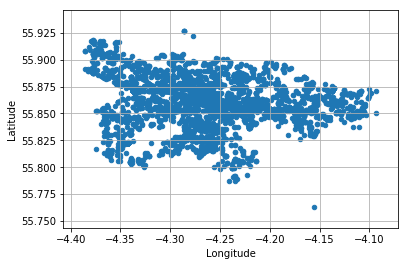

In [24]:
# uncomment to visualize matplotlib plots in the notebook (only need to run it once per notebook... usually with the imports)
%matplotlib inline  

df.plot('Longitude', 'Latitude', kind='scatter', grid=True)

In [7]:
df[df.Longitude>0]

FHRSID LocalAuthorityBusinessID BusinessName             BusinessType  \
93  905249             16/00516/COM    Al Sultan  Restaurant/Cafe/Canteen   

    BusinessTypeID      AddressLine2 AddressLine3 PostCode RatingValue  \
93               1  61 Bridge Street      Glasgow      NaN        Pass   

          RatingKey      ...      LocalAuthorityCode  LocalAuthorityName  \
93  fhis_pass_en-GB      ...                     776        Glasgow City   

        LocalAuthorityWebSite  LocalAuthorityEmailAddress Scores  SchemeType  \
93  http://www.glasgow.gov.uk  food.safety@glasgow.gov.uk    NaN        FHIS   

   NewRatingPending  Longitude   Latitude  AddressLine1  
93            False    0.11797  52.208875  Storey 1 - 3  

[1 rows x 21 columns]

In [8]:
# From a quick google maps search: 61 Bridge St, Glasgow G5 9JB  => 55.853033, -4.258319
df.loc[93, 'Longitude'] = -4.258319
df.loc[93, 'Latitude'] = 55.853033

# or..  df.loc[93, ['Longitude','Latitude']] = -4.258319, 55.853033

### getting rid of NaNs
if it makes sense you can:
```python
    df['Latitude'].fillna(999)
    df['Latitude'].fillna(method='ffill')
    df['Latitude'].dropna()
```

In [9]:
is_null = pd.isnull(df.Latitude)
is_null.value_counts()

False    5053
True      194
Name: Latitude, dtype: int64

In [10]:
df = df.dropna(subset=['Latitude'])

### Want more fancy plotting?

In [11]:
import folium
from folium.plugins import HeatMap

In [12]:
m = folium.Map(
    location=[55.863823, -4.267681],
    zoom_start=13,
    tiles='cartodbpositron',
)

rating_color={
    'fhis_awaiting_inspection_en-GB': 'gray',
    'fhis_improvement_required_en-GB': 'red',
    'fhis_pass_en-GB': 'yellow',
    'fhis_pass_and_eat_safe_en-GB': 'green',
}

for _, row in df.iterrows():   
    info_txt = "<b>{}</b><br>(<i>{}</i>, {})".format(row.BusinessName.replace("'", "`"), row.RatingValue, row.RatingDate)
    folium.Circle(
        radius=10,
        location=[row.Latitude, row.Longitude],
        tooltip=info_txt,
        color='black',
        weight=0.5,
        fill_opacity=0.8,
        fill_color=rating_color[row.RatingKey],
        fill=True,
    ).add_to(m)
    
m   # FYI: for some reason this one is rendered only on Firefox

### Let's bring some heat

In [13]:
m = folium.Map(
    location=[55.863823, -4.267681],
    zoom_start=12,
    tiles='cartodbpositron'
)

data_needing_improvements = df.loc[df.RatingValue == 'Improvement Required', ['Latitude', 'Longitude']].values
data_pass_plus = df.loc[df.RatingValue == 'Pass and Eat Safe', ['Latitude', 'Longitude']].values

HeatMap(data=data_needing_improvements, name='need_improvements', show=False).add_to(m)
HeatMap(data=data_pass_plus, name='pass_plus', show=False).add_to(m)
folium.LayerControl().add_to(m)

m

## Combining data

#### Yelp data
I've downloaded and matched businesses based on location and name and saved only the matches with good enough confidence to the yelp_matched.csv file. The data has been augumented with the FHRSID of the corresponding matches.

In [14]:
df_yelp_matched = pd.read_csv('data/yelp_matched.csv')
df_yelp_matched.head()

name  rating  review_count price   latitude  longitude  \
0          Papa Gills     3.5             4   NaN  55.888286  -4.378524   
1    Kismet Carry Out     3.5             2     £  55.908425  -4.386131   
2   Remo's Fast Foods     4.0             1   NaN  55.814365  -4.360539   
3  Traceys Fast Foods     1.0             1   NaN  55.814439  -4.360600   
4           Cafe Asia     5.0             4    ££  55.821804  -4.361971   

  zip_code                      id                  address1  FHRSID  
0  G14 0QL  q914R_1SiZCts3EcI0Fvqw  2372-2376 Dumbarton Road   95732  
1  G15 8PA  muS22WQaPD6ZPCR1w1Kgvg      311 Drumry Road East   95353  
2  G53 7BL  R1RDz9hLwHr6UzdRufZqdg         339 Nitshill Road  123482  
3  G53 7BL  NjrfSj87AUhNggBPgWHGCw         327 Nitshill Road   18661  
4  G53 7DA  xZrD0xkg9QqgTQQqNRqkgQ        1357 Barrhead Road  406756

In [15]:
# most yelp rated business
df_yelp_matched.sort_values('review_count', ascending=False).head(3)

name  rating  review_count price   latitude  \
446  The Butterfly and the Pig     4.5           177    ££  55.864196   
447          Bread Meats Bread     4.0           154    ££  55.861564   
226            Ubiquitous Chip     4.5           127   £££  55.874915   

     longitude zip_code                      id               address1  FHRSID  
446  -4.260933   G2 4SQ  pnSROB18JmOIOi3Nmaih5w        153 Bath Street   26236  
447  -4.256361   G2 5UB  3iUvNCibzS22lKUsGcalWA  104 St Vincent Street  607032  
226  -4.293247  G12 8SJ  rmaH1My396rCYEnL8XQtPg       8-12 Ashton Lane   56097

In [16]:
# highest rated businesses
df_yelp_matched \
    .sort_values(['rating', 'review_count'], ascending=False) \
    .head()

name  rating  review_count price   latitude  longitude  \
180   Two Fat Ladies     5.0            15   £££  55.870244  -4.298026   
425  Sapori d'Italia     5.0            14    ££  55.827461  -4.259119   
469         Al Dente     5.0            13    ££  55.855241  -4.250354   
54        Wee Lochan     5.0            11   £££  55.878009  -4.322210   
129      111 By Nico     5.0            10   £££  55.888143  -4.306677   

    zip_code                      id              address1  FHRSID  
180  G11 6NX  njqKz-SdhsJt1eOV26APcg     88 Dumbarton Road   95672  
425  G42 9XJ  xvpPvfe8tiiTVh_RSsvz2A    1021 Cathcart Road  984737  
469   G1 4LW  ANyZ9smpiu2nxn5S2rCmTw  120 Stockwell Street   46639  
54   G11 7HT  2bgGFTdklZkqx_kes_y7fQ         340 Crow Road  448778  
129  G12 0JU  mVUrtt-CmLSF89Rdl1Zntg     111 Cleveden Road   49192

#### Merging data on the FHRSID

In [17]:
df_combined = pd.merge(left=df, right=df_yelp_matched, on='FHRSID', how='inner')
df_combined.head()

FHRSID LocalAuthorityBusinessID     BusinessName             BusinessType  \
0  772027             15/00388/COM         1051 GWR  Restaurant/Cafe/Canteen   
1   49192             11/01114/COM      111 By Nico  Restaurant/Cafe/Canteen   
2   36362             10/01017/COM             2 Go  Restaurant/Cafe/Canteen   
3   95689         28650/0279/0/000  279 Cafe Bistro  Restaurant/Cafe/Canteen   
4  581121             13/00703/COM    393 Caffe Bar   Takeaway/sandwich shop   

   BusinessTypeID             AddressLine2 AddressLine3 PostCode RatingValue  \
0               1  1051 Great Western Road      Glasgow  G12 0XP        Pass   
1               1        109 Cleveden Road      Glasgow  G12 0JU        Pass   
2               1       397 Dumbarton Road      Glasgow  G11 6BE        Pass   
3               1       279 Dumbarton Road      Glasgow  G11 6AB        Pass   
4            7844     393 Alexandra Parade      Glasgow  G31 3AD        Pass   

         RatingKey          ...          AddressLine1             name rating  \
0  fhis_pass_en-GB          ...                   NaN         1051 GWR    3.0   
1  fhis_pass_en-GB          ...                   NaN      111 By Nico    5.0   
2  fhis_pass_en-GB          ...                   NaN        2 Go Cafe    4.0   
3  fhis_pass_en-GB          ...                   NaN  279 Cafe Bistro    4.5   
4  fhis_pass_en-GB          ...                   NaN    Caffe 393 Bar    3.0   

  review_count price   latitude longitude  zip_code                      id  \
0            5    ££  55.884459 -4.310921   G12 0XP  VSc4gdSzCV7fw9QRG2xxeQ   
1           10   £££  55.888143 -4.306677   G12 0JU  mVUrtt-CmLSF89Rdl1Zntg   
2            1   NaN  55.870858 -4.308519   G11 6BE  kKzLEkrNG2EsLNIM2pb_XA   
3            3    ££  55.870810 -4.304700   G11 6AB  97DcB_MBs_jBi6omJR8TGA   
4            1   NaN  55.864477 -4.222797       G31  ARY2rVUaxkjoAjEEO3Tkag   

               address1  
0  1051 Gt Western Road  
1     111 Cleveden Road  
2    391 Dumbarton Road  
3    279 Dumbarton Road  
4  393 Alexandra Parade  

[5 rows x 30 columns]

In [18]:
df_combined.iloc[527]

FHRSID                                                 666017
LocalAuthorityBusinessID                         14/00382/COM
BusinessName                                    Pommes Frites
BusinessType                           Takeaway/sandwich shop
BusinessTypeID                                           7844
AddressLine2                           476 Sauchiehall Street
AddressLine3                                          Glasgow
PostCode                                               G2 3LW
RatingValue                              Improvement Required
RatingKey                     fhis_improvement_required_en-GB
RatingDate                                         2017-11-03
LocalAuthorityCode                                        776
LocalAuthorityName                               Glasgow City
LocalAuthorityWebSite               http://www.glasgow.gov.uk
LocalAuthorityEmailAddress         food.safety@glasgow.gov.uk
Scores                                                    NaN
SchemeTy

#### So many columns..
let's create a smaller dataframe with only the stuff we are interested in

In [19]:
qdf = df_combined[['rating', 'review_count']].copy()

# converting price from symbols to number ('£££' to 3)
qdf['price'] = df_combined['price'] \
                .fillna('') \
                .apply(len) \
                .replace(0, pd.np.nan)

fsa_rating_order = ['Improvement Required', 'Awaiting Inspection', 'Pass', 'Pass and Eat Safe']
qdf['fsa_rating'] = df_combined['RatingValue'].apply(fsa_rating_order.index)

qdf.head()

rating  review_count  price  fsa_rating
0     3.0             5    2.0           2
1     5.0            10    3.0           2
2     4.0             1    NaN           2
3     4.5             3    2.0           2
4     3.0             1    NaN           2

## Are more hyginic restaurants getting better yelp ratings?

In [20]:
# let's ignore restaurants with few reviews
has_enough_reviews = qdf['review_count'] > 3  

compare = qdf[has_enough_reviews].groupby('fsa_rating')['rating'].agg(('mean', 'std'))
compare.index = fsa_rating_order
compare

mean       std
Improvement Required  3.858491  0.653227
Awaiting Inspection   3.909091  0.700649
Pass                  3.830645  0.621594
Pass and Eat Safe     3.884615  0.362506

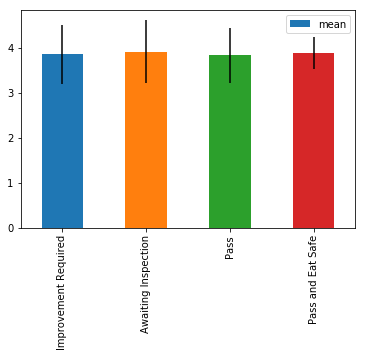

In [21]:
compare.plot.bar(y='mean', yerr='std')

mm... doesn't look like it

## What about price vs rating?

count       std      mean   std_err
£       157  0.664740  3.824841  0.815316
££      284  0.567439  3.825704  0.753286
£££      39  0.570295  4.128205  0.755179
££££      4  0.853913  3.625000  0.924074

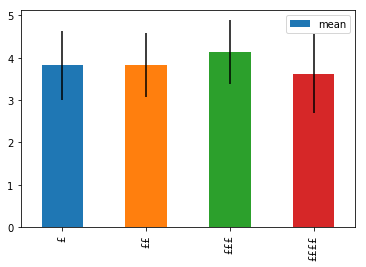

In [22]:
compare = qdf[has_enough_reviews] \
            .dropna(subset=['price']) \
            .groupby('price')['rating'] \
            .agg({'mean', 'std', 'count'})
compare.index = ['£'*(i+1) for i in range(4)]

compare['std_err'] = compare['std'] / pd.np.sqrt(compare['std'])
compare.plot.bar(y='mean', yerr='std_err')
compare

Why such bigger error bars on the high price ones?
That's probably due to sample size (less pricy restaurants than cheap ones)

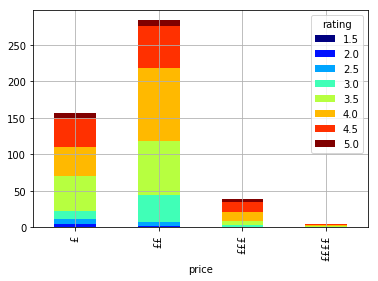

In [23]:
qdf[has_enough_reviews]\
    .dropna(subset=['price'])\
    .groupby(['price', 'rating'])\
    .count()\
    .unstack(1)\
    .fillna(0)\
    .rename({i:'£'*i for i in range(1,5)})\
    ['review_count'].plot(kind='bar', stacked=True, grid=True, cmap='jet')

# That's all folks! =D
..questions?